<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/%EC%B5%9C%EC%86%8C_%EC%8A%A4%ED%8C%A8%EB%8B%9D_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최소 스패닝 트리

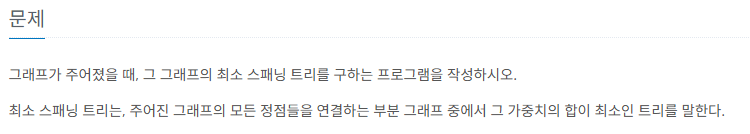

## 입력 출력 및 예제


* 입력

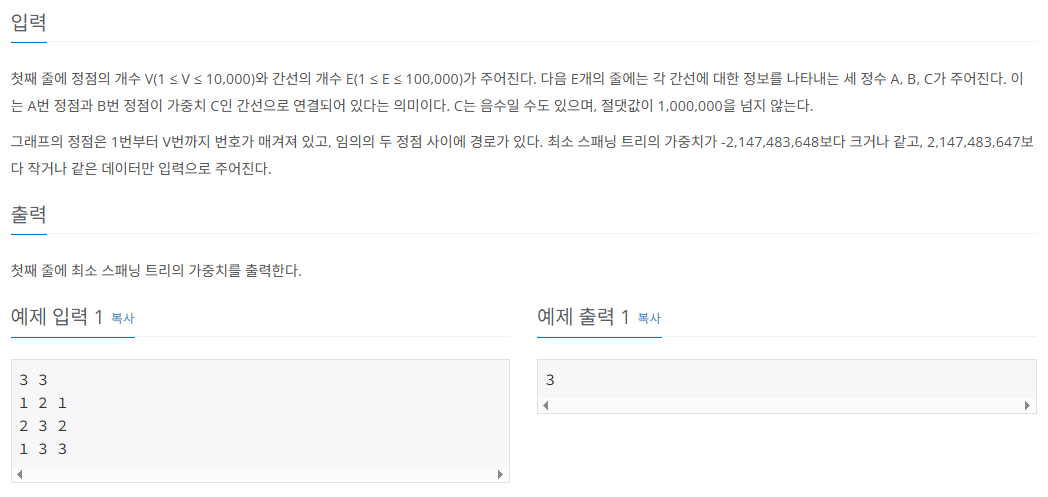

* 출력

* 예제

## 구상

- 스패닝 트리 : 모든 정점을 잇지만, 사이클이 없는 부분 그래프
- V개의 정점이 있다면 (V-1)개의 간선(사이클이 없는)을 선택해야함
- 주어진 입력에서 가중치에 대해 오름차순으로 정렬하여 채워나가기
- 동시에 사이클이 이루어지지 않도록.


## 코드

In [ ]:
def solve():
    V, E = map(int, input().split())
    edges = []
    for _ in range(E):
        a, b, w = map(int, input().split())
        edges.append((w, a, b))

    edges.sort()  # w 오름차순

    parent = list(range(V + 1))
    rank = [0] * (V + 1)

    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]  # 경로 압축 (한 단계 점프)
            x = parent[x]
        return x

    def union(a, b):
        ra, rb = find(a), find(b)
        # 루프가 발생하는 순간
        if ra == rb:
            return False
        # union by rank
        if rank[ra] < rank[rb]:
            parent[ra] = rb
        elif rank[ra] > rank[rb]:
            parent[rb] = ra
        else:
            parent[rb] = ra
            rank[ra] += 1
        return True

    total = 0
    picked = 0

    for w, a, b in edges:
        if union(a, b):
            total += w
            picked += 1
            if picked == V - 1:
                break

    print(total)


if __name__ == "__main__":
    solve()


3 3
1 2 1
2 3 2
1 3 3
3


### 메모
- Kruskal
- Union-Find
- Edges는 많이 주어질 수 있기 때문에. w에 따라 오름차순 정렬 후 들어오는 순서대로 처리하는 것이고, union이 그 처리 과정을 최적화 시켜준다


*